In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
def fitness_function(position):
    conflicts = 0
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if graph[i][j] and position[i] == position[j]:
                conflicts += 1
    return conflicts

def pso(num_particles, num_iterations):
    particles = np.random.randint(num_colors, size=(num_particles, num_vertices))
    velocities = np.zeros((num_particles, num_vertices))
    best_positions = np.copy(particles)
    global_best = particles[0]
    global_best_fitness = fitness_function(global_best)
    best_fitness_values = []

    for _ in range(num_iterations):
        for i in range(num_particles):
            velocities[i] = velocities[i] + random.random() * (best_positions[i] - particles[i]) \
                            + random.random() * (global_best - particles[i])
            particles[i] = particles[i] + velocities[i]
            particles[i] = np.clip(particles[i], 0, num_colors - 1)
            
            # Check and update color based on adjacency
            for j in range(num_vertices):
                colors_used = set(particles[i, k] for k in range(num_vertices) if graph[j, k])
                available_colors = set(range(num_colors)) - colors_used
                if particles[i, j] not in available_colors:
                    if available_colors:
                        particles[i, j] = min(available_colors)
                    else:
                        particles[i, j] = num_colors  # Assign a new color
            
            if fitness_function(particles[i]) < fitness_function(best_positions[i]):
                best_positions[i] = np.copy(particles[i])
            if fitness_function(particles[i]) < global_best_fitness:
                global_best = np.copy(particles[i])
                global_best_fitness = fitness_function(global_best)
        best_fitness_values.append(global_best_fitness)

    return global_best, best_fitness_values

# Define the graph using adjacency matrix
# graph = np.array([[0, 1, 1, 0],
#                   [1, 0, 1, 1],
#                   [1, 1, 0, 1],
#                   [0, 1, 1, 0]])

graph = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0 ,1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0]
])

# Number of vertices in the graph
num_vertices = graph.shape[0]

# Number of colors
num_colors = 3

# Parameters for PSO
num_particles = 3
num_iterations =20

# Solve the graph coloring problem using PSO
best_color_assignment, best_fitness_values = pso(num_particles, num_iterations)

# Calculate the minimum number of colors required
min_num_colors = max(best_color_assignment) + 1

# Color the graph using the minimum number of colors required
if min_num_colors <= num_colors:
    num_colors = min_num_colors
    best_color_assignment = [color % num_colors for color in best_color_assignment]
else:
    raise ValueError("The graph cannot be colored within the given number of colors.")

# Print the best color assignments for each vertex
print("Best color assignments:", best_color_assignment)

Best color assignments: [1, 0, 2, 0, 2, 0, 2]


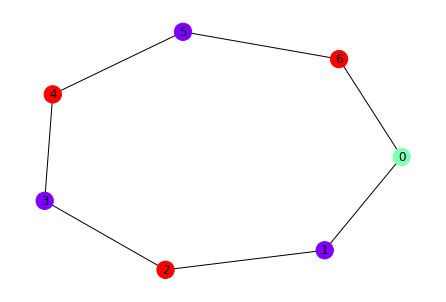

In [5]:
# Create a graph using NetworkX
G = nx.from_numpy_matrix(graph)

# Assign colors to nodes
node_colors = [best_color_assignment[i] for i in range(num_vertices)]

# Visualize the colored graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap='rainbow')
plt.show()
